In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [40]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [41]:
#rr_2016.head()
#tt_2016.head()
#rr_2019.head()
#tt_2019.head()
#rr_2016.shape -->2822 rows, 11 columns
#tt_2016.shape -->1541 rows, 11 colums
#rr_2019.shape --> 5503 rows, 11 columns
#tt_2019.shape -->2655-rows,11 columns

we can see that all datatables contain the same columns(latitude,longitude,elevation,temp,power,cadence,hr,distance,elevation_gain,speed,timedelta)
we can see that some datasets are larger and they contain more rows

**Question 1** <br>
<p> What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride <p/>

As the naming of the columns are consistent I will  take the average of the column 'Speed' in all four datatables

In [42]:
rr_2016.describe()
rr_2016_distance=sum(rr_2016.distance)
rr_2016_averagespeed=rr_2016['speed'].mean()
print('2016 Road race total distance:',rr_2016_distance, 'average speed:', rr_2016_averagespeed)
tt_2016_distance=sum(tt_2016.distance)
tt_2016_averagespeed=tt_2016['speed'].mean()
print('2016 Time Trial total distance:',tt_2016_distance, 'average speed:', tt_2016_averagespeed)
rr_2019_distance=sum(rr_2019.distance)
rr_2019_averagespeed=rr_2019['speed'].mean()
print('2019 Road race total distance:',rr_2019_distance, 'average speed:', rr_2019_averagespeed)
tt_2019_distance=sum(tt_2019.distance)
tt_2019_averagespeed=tt_2019['speed'].mean()
print('2019 Time Trial total distance:',tt_2019_distance, 'average speed:', tt_2019_averagespeed)


2016 Road race total distance: 49.04858574628641 average speed: 34.93308475482947
2016 Time Trial total distance: 24.8028870313081 average speed: 33.52996304869014
2019 Road race total distance: 51.78913253596059 average speed: 33.87986137188044
2019 Time Trial total distance: 24.38014504376576 average speed: 33.05782378815691


**Some analysis** <br>
<p> We can see that the road races are longer and the average speed tends to be higher than the time trials. <p/>
<p> I am mostly interested in 'Speed', 'distance', and 'elevation' for my purposes. So let's take a look at those columns . <p/>

In [58]:
#Summary of the races
rr_2016_todescribe=rr_2016[['speed', 'distance','elevation']]
tt_2016_todescribe=tt_2016[['speed', 'distance','elevation']]
rr_2019_todescribe=rr_2019[['speed', 'distance','elevation']]
tt_2019_todescribe=tt_2019[['speed', 'distance','elevation']]

#turning the dataframes into pandas dataframes
rr_2016_todescribe=pd.DataFrame(rr_2016_todescribe)
tt_2016_todescribe=pd.DataFrame(tt_2016_todescribe)
rr_2019_todescribe=pd.DataFrame(rr_2019_todescribe)
tt_2019_todescribe=pd.DataFrame(tt_2019_todescribe)

rr_2016_todescribe.describe()
tt_2016_todescribe.describe()
rr_2019_todescribe.describe()
tt_2019_todescribe.describe()

,speed,distance,elevation
count,2655.000000,2655.000000,2655.000000
mean,33.057824,0.009183,250.435104
std,9.773522,0.002715,29.434104
min,0.000000,0.000000,195.800000
25%,26.440757,0.007345,229.200000
50%,33.220108,0.009228,243.800000
75%,39.286242,0.010913,276.200000
max,63.300734,0.017584,312.200000


**Some analysis** <br>

We can see the timed trials have a higher standard deviation of speed which means the speeds vary more than the road races. The mean elevations are around the 250.000000 mark with tt_2016 having a smaller average elevation(139.068657) which would explain why the average speed is higher than the other timetrial (tt_2019).

**Question 2** <br>
Compare the range of speeds for each ride, are time trials faster than road races?

In [65]:
rr_2016_smoothspeed= rr_2016['speed'].rolling(window=30, min_periods=1,center=True).mean()
tt_2016_smoothspeed = tt_2016['speed'].rolling(window=30, min_periods=1,center=True).mean()
rr_2019_smoothspeed= rr_2019['speed'].rolling(window=30, min_periods=1,center=True).mean()
tt_2019_smoothspeed= tt_2019['speed'].rolling(window=30, min_periods=1,center=True).mean()


**I will create dataframes that have the smoothed speed** <br />
I will create 4 dataframes for all four races

In [66]:
rr2016_smooth_data=pd.DataFrame()
rr2016_smooth_data['speed']=rr_2016_smoothspeed

In [67]:
tt2016_smooth_data=pd.DataFrame()
tt2016_smooth_data['speed']=tt_2016_smoothspeed

In [77]:
rr2019_smooth_data=pd.DataFrame()
rr2019_smooth_data['speed']=rr_2019_smoothspeed

In [76]:
tt2019_smooth_data=pd.DataFrame()
tt2019_smooth_data['speed']=tt_2019_smoothspeed

1. I will use the index to get the the total hours from minutes 
2. Calculate the total minutes by multiplying the hours with 60 and then adding the remaining minutes
3. Subtract every minute row by the beginning time so the totalmins column starts from 0 

In [10]:
rr2016_smooth_data['hour']=(rr2016_smooth_data.index.strftime("%H")).astype('int32')
rr2016_smooth_data['minute']=(rr2016_smooth_data.index.strftime("%M")).astype('int32')
rr2016_smooth_data['totalmins']=(rr2016_smooth_data['hour']*60)+(rr2016_smooth_data['minute'])
rr2016_smooth_data['totalmins']=rr2016_smooth_data['totalmins']-242

In [11]:
tt2016_smooth_data['hour']=(tt2016_smooth_data.index.strftime("%H")).astype('int32')
tt2016_smooth_data['minute']=(tt2016_smooth_data.index.strftime("%M")).astype('int32')
tt2016_smooth_data['totalmins']=(tt2016_smooth_data['hour']*60)+(tt2016_smooth_data['minute'])
tt2016_smooth_data['totalmins']=tt2016_smooth_data['totalmins']-1385

In [12]:
tt2019_smooth_data['hour']=(tt2019_smooh_data.index.strftime("%H")).astype('int32')
tt2019_smooth_data['minute']=(tt2019_smooth_data.index.strftime("%M")).astype('int32')
tt2019_smooth_data['totalmins']=(tt2019_smooth_data['hour']*60)+(tt2019_smooth_data['minute'])
tt2019_smooth_data['totalmins']=tt2019_smooth_data['totalmins']-1374

In [79]:
#rr2019_smooth_data['hour']=(rr2019_smooth_data.index.strftime("%H")).astype('int32')
#rr2019_smooth_data['hour']
#rr2019_smooth_data.loc[rr2019_smooth_data['first_name']=='Mihir']


In [80]:
rr2019_smooth_data['hour']=(rr2019_smooth_data.index.strftime("%H")).astype('int32')
rr2019_smooth_data['hour']
#if the hour shows 00:--> we want to add 24 
#usually we would have to fix for hours following 00, but our dataset ends at 00 hours so it's sufficient to just fix for 00
for x in rr2019_smooth_data.index:
  if rr2019_smooth_data.loc[x, "hour"] < 1:
    rr2019_smooth_data.loc[x, "hour"] = 24

rr2019_smooth_data['minute']=(rr2019_smooth_data.index.strftime("%M")).astype('int32')
rr2019_smooth_data['totalmins']=(rr2019_smooth_data['hour']*60)+(rr2019_smooth_data['minute'])
rr2019_smooth_data['totalmins']=rr2019_smooth_data['totalmins']-1353

Let's create a lineplot to visualize the speeds during races.

Text(0, 0.5, 'Speed (Km/hr)')

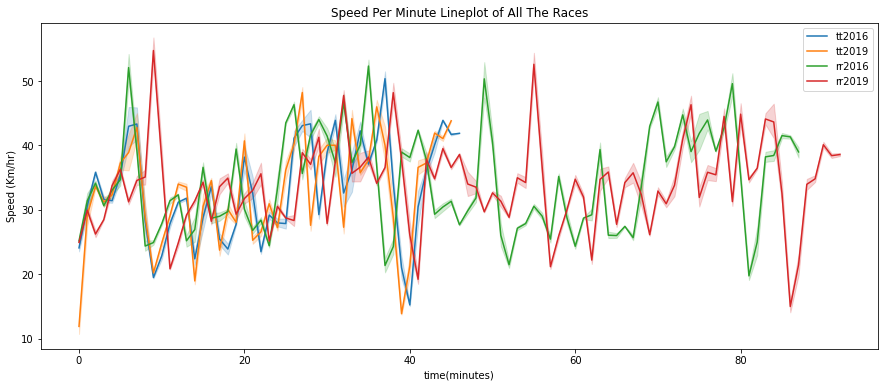

In [14]:
plt.figure(figsize=(15, 6))
plt.title('Speed Per Minute Lineplot of All The Races')
sns.lineplot(data=tt2016_smooth_data, x="totalmins", y="speed",label='tt2016')
sns.lineplot(data=tt2019_smooth_data, x="totalmins", y="speed",label='tt2019')
sns.lineplot(data=rr2016_smooth_data, x="totalmins", y="speed",label='rr2016')
sns.lineplot(data=rr2019_smooth_data, x="totalmins", y="speed",label='rr2019')
plt.xlabel("time(minutes)")
plt.ylabel("Speed (Km/hr)")

In [15]:
print("rr_2016 max speed:", max(rr2016_smooth_data.speed),"min speed:", min(rr2016_smooth_data.speed), "average speed:", rr_2016_averagespeed)
print("tt_2016 max speed:", max(tt2016_smooth_data.speed),"min speed:", min(tt2016_smooth_data.speed), "average speed:", tt_2016_averagespeed)
print("rr_2019 max speed:", max(rr2019_smooth_data.speed),"min speed:", min(rr2019_smooth_data.speed), "average speed:", rr_2019_averagespeed)
print("tt_2019 max speed:", max(tt2019_smooth_data.speed),"min speed:", min(tt2019_smooth_data.speed), "average speed:", tt_2019_averagespeed)

rr_2016 max speed: 60.429113415530544 min speed: 17.814832096620012 average speed: 34.93308475482947
tt_2016 max speed: 58.09915532919932 min speed: 14.405403668745755 average speed: 33.52996304869014
rr_2019 max speed: 65.11441273459903 min speed: 10.886032950586927 average speed: 33.87986137188044
tt_2019 max speed: 57.953384967012106 min speed: 9.899853932994528 average speed: 33.05782378815691


In [16]:
biggest_average={'Road Race 2016':(rr_2016_smoothspeed.mean()), 'Time Trial 2016':(tt_2016_smoothspeed.mean()),'Road Race 2019':(rr_2019_smoothspeed.mean()),'Time Travel 2019':(tt_2019_smoothspeed.mean())}
biggest_average_name=max(biggest_average, key=biggest_average.get)
biggest_average_speed=max(biggest_average.values())
print(biggest_average_name)
print("The fastest race is:",biggest_average_name, "with" ,biggest_average_speed, "km/h")

Road Race 2016
The fastest race is: Road Race 2016 with 34.94612886086459 km/h


**Some comments on the outcome** <br>
We can see the same pattern as described in question1. Both road races have  faster average speeds than the road races which is probably caused by one person blocking the wind in a road race. And the fastest race is the 2016 Road Race followed by the 2019 Road Race.

**Question 3** <br>
Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.


Let's create a lineplot that only consists of the time trials so we can visualize better.

Text(0, 0.5, 'Speed (Km/hr)')

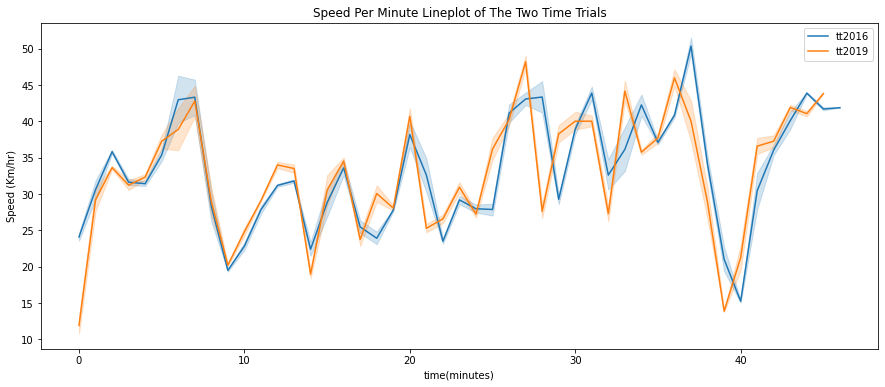

In [17]:
tt_2016.speed.idxmax()
plt.figure(figsize=(15, 6))
plt.title("Speed Per Minute Lineplot of The Two Time Trials")
sns.lineplot(data=tt2016_smooth_data, x="totalmins", y="speed",label='tt2016')
sns.lineplot(data=tt2019_smooth_data, x="totalmins", y="speed",label='tt2019')
plt.xlabel("time(minutes)")
plt.ylabel("Speed (Km/hr)")

**Some comments on the outcome** <br>
We can see that the speeds of the two races are pretty similar.
I'll use the same code in question 3 to generate the maximum and the minimum speeds in each race.
I will use the smoothed numbers for this since the unsmoothed numbers contain a max speed of 162 km/h for the 2016 time trial which seems like an error.

In [18]:
print("tt_2016 max speed:", max(tt2016_smooth_data.speed),"min speed:", min(tt2016_smooth_data.speed), "average speed:", tt_2016_averagespeed)
print("tt_2019 max speed:", max(tt2019_smooth_data.speed),"min speed:", min(tt2019_smooth_data.speed), "average speed:", tt_2019_averagespeed)

tt_2016 max speed: 58.09915532919932 min speed: 14.405403668745755 average speed: 33.52996304869014
tt_2019 max speed: 57.953384967012106 min speed: 9.899853932994528 average speed: 33.05782378815691


**Some comments on the outcome**<br>
Overall the speeds seem similar while the 2016 race is faster on average as well as the max speed achieved.

**Question4** <br>
From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.


Let's create tables that show elevation gain and speed at the time.

In [19]:
rr2016_smooth_data['elevation_gain']=rr_2016.elevation_gain
rr2016_elevationgain=rr2016_smooth_data.drop(columns=['hour', 'minute','totalmins'])

In [20]:
tt2016_smooth_data['elevation_gain']=tt_2016.elevation_gain
tt2016_elevationgain=tt2016_smooth_data.drop(columns=['hour', 'minute','totalmins'])
rr2019_smooth_data['elevation_gain']=rr_2019.elevation_gain
rr2019_elevationgain=rr2019_smooth_data.drop(columns=['hour', 'minute','totalmins'])
tt2019_smooth_data['elevation_gain']=tt_2019.elevation_gain
tt2019_elevationgain=tt2019_smooth_data.drop(columns=['hour', 'minute','totalmins'])
tt2019_elevationgain

,speed,elevation_gain
2019-06-01 22:54:55+00:00,9.899854,0.0
2019-06-01 22:54:56+00:00,10.941697,0.0
2019-06-01 22:54:57+00:00,11.958947,0.0
2019-06-01 22:54:58+00:00,12.883065,0.0
2019-06-01 22:54:59+00:00,13.816966,0.0
...,...,...
2019-06-01 23:39:05+00:00,43.860394,-0.2
2019-06-01 23:39:06+00:00,43.860741,0.0
2019-06-01 23:39:07+00:00,43.872043,-0.2
2019-06-01 23:39:08+00:00,43.884675,-0.2


In [21]:
frames = [rr2016_elevationgain, tt2016_elevationgain, rr2019_elevationgain, tt2019_elevationgain]
alltrials = pd.concat(frames)
alltrials

,speed,elevation_gain
2016-05-14 04:02:41+00:00,23.416700,0.0
2016-05-14 04:02:42+00:00,23.867232,0.0
2016-05-14 04:02:46+00:00,24.313179,0.0
2016-05-14 04:02:49+00:00,24.842779,0.0
2016-05-14 04:02:51+00:00,25.304967,0.0
...,...,...
2019-06-01 23:39:05+00:00,43.860394,-0.2
2019-06-01 23:39:06+00:00,43.860741,0.0
2019-06-01 23:39:07+00:00,43.872043,-0.2
2019-06-01 23:39:08+00:00,43.884675,-0.2


Let's create a boxplot to better visualise the elevation distibution and analyse the elevation effects on speed.

Text(0, 0.5, 'Speed (Km/hr)')

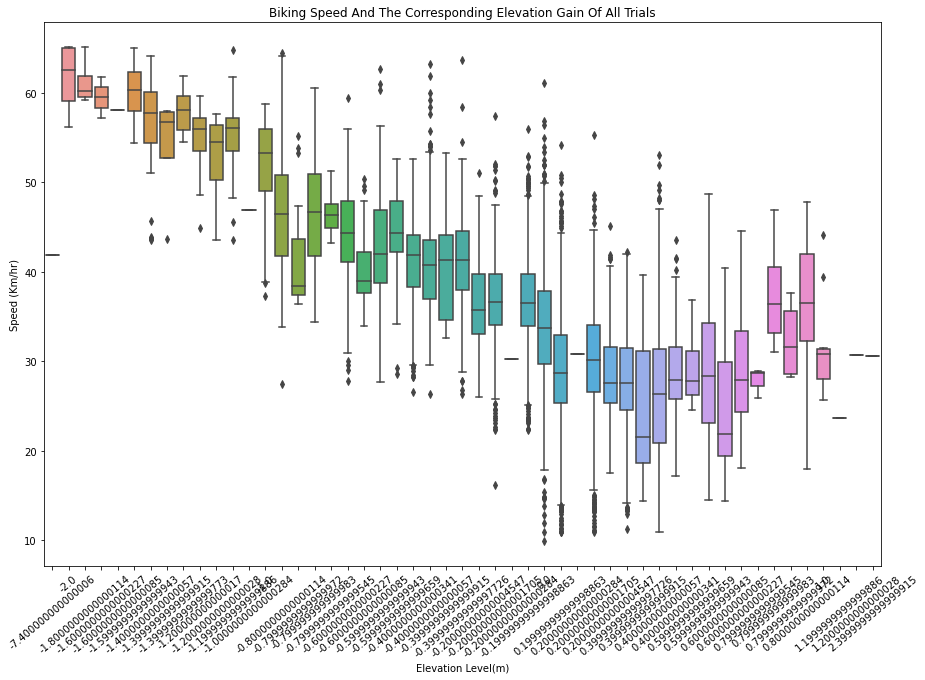

In [22]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="elevation_gain", y="speed", data=alltrials).set_title("Biking Speed And The Corresponding Elevation Gain Of All Trials")
plt.xticks(rotation=40)
plt.xlabel("Elevation Level(m)")
plt.ylabel("Speed (Km/hr)")


We can see that a (-) elevation increases the speed while a positive (hilly) elevation gain decreases it.
Let's create 3 groups(climbing,flat and descending and see the average speeds)
I will creaste the groups looking at the boxplot. It looks like a 0.4 elevation and further can be considered as climbing. Between 0.4 and -0.5 can be considered as flat and finally anything smaller than a -0.5 elevation can be considered descending.

In [23]:
climbing=alltrials[(alltrials.elevation_gain>0.4)]
climbing_speed_average=climbing['speed'].mean()
print("The climbing average speed is:",climbing_speed_average)
flat=alltrials[(alltrials.elevation_gain <0.4) & (alltrials.elevation_gain >-0.5)]
flat_speed_average=flat['speed'].mean()
print("The flat average speed is:",flat_speed_average)
descending=alltrials[(alltrials.elevation_gain < -0.5)]
descending_speed_average=descending['speed'].mean()
print("The descending average speed is:",descending_speed_average)

The climbing average speed is: 27.63540462612459
The flat average speed is: 33.63604229787741
The descending average speed is: 46.738892565794586


**Some analysis on the results** <br>
We can clearly see that the climbing average speeds are lower than the flat surface speeds and then descending speeds which was an expected result.

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





cadence=$\frac{rotation}{minute}$  <br>
speed=$\frac{km}{hour}$  <br>
We're trying to get m/rotation <br>
If we do speed/cadence we get $\frac{50 x speed}{3 x cadence}$=$\frac{meter}{rotation}$ <br>
we can see that $\frac{meter}{rotation}$=development

In [24]:
rr_2016_challenge=rr_2016[['speed', 'cadence']]
tt_2016_challenge=tt_2016[['speed', 'cadence']]
rr_2019_challenge=rr_2019[['speed', 'cadence']]
tt_2019_challenge=tt_2019[['speed', 'cadence']]

In [25]:
rr_2016_smooth=pd.DataFrame()
rr_2016_smooth['SPEED']= rr_2016_challenge['speed'].rolling(window=30, min_periods=1,center=True).mean()
rr_2016_smooth['CADENCE']=rr_2016_challenge['cadence']
tt_2016_smooth=pd.DataFrame()
tt_2016_smooth['SPEED']= tt_2016_challenge['speed'].rolling(window=30, min_periods=1,center=True).mean()
tt_2016_smooth['CADENCE']=tt_2016_challenge['cadence']
rr_2019_smooth=pd.DataFrame()
rr_2019_smooth['SPEED']= rr_2019_challenge['speed'].rolling(window=30, min_periods=1,center=True).mean()
rr_2019_smooth['CADENCE']=rr_2019_challenge['cadence']
tt_2019_smooth=pd.DataFrame()
tt_2019_smooth['SPEED']= rr_2019_challenge['speed'].rolling(window=30, min_periods=1,center=True).mean()
tt_2019_smooth['CADENCE']=rr_2019_challenge['cadence']

In [26]:
rr_2016_smooth['Development']=(rr_2016_smooth['SPEED']*50)/(rr_2016_smooth['CADENCE']*3)
tt_2016_smooth['Development']=(tt_2016_smooth['SPEED']*50)/(tt_2016_smooth['CADENCE']*3)
rr_2019_smooth['Development']=(rr_2019_smooth['SPEED']*50)/(rr_2019_smooth['CADENCE']*3)
tt_2019_smooth['Development']=(tt_2019_smooth['SPEED']*50)/(tt_2019_smooth['CADENCE']*3)

Let's remove the rows where cadence is 0 because our formula doesn't apply to those with 0 cadence as we shouldn't have 0 as a denominator.
Next we'll remove any development values that isn't between 2-10 metres.

In [27]:
rr_2016_smooth.drop(rr_2016_smooth.index[rr_2016_smooth['CADENCE'] == 0.0], inplace = True)
rr_2016_smooth.drop(rr_2016_smooth.index[rr_2016_smooth['Development'] > 10.0], inplace = True)
rr_2016_smooth.drop(rr_2016_smooth.index[rr_2016_smooth['Development'] < 2.0], inplace = True)
#Let's do the same with the other trials
tt_2016_smooth.drop(tt_2016_smooth.index[tt_2016_smooth['CADENCE'] == 0.0], inplace = True)
tt_2016_smooth.drop(tt_2016_smooth.index[tt_2016_smooth['Development'] > 10.0], inplace = True)
tt_2016_smooth.drop(tt_2016_smooth.index[tt_2016_smooth['Development'] < 2.0], inplace = True)
#--
rr_2019_smooth.drop(rr_2019_smooth.index[rr_2019_smooth['CADENCE'] == 0.0], inplace = True)
rr_2019_smooth.drop(rr_2019_smooth.index[rr_2019_smooth['Development'] > 10.0], inplace = True)
rr_2019_smooth.drop(rr_2019_smooth.index[rr_2019_smooth['Development'] < 2.0], inplace = True)
#--
tt_2019_smooth.drop(tt_2019_smooth.index[tt_2019_smooth['CADENCE'] == 0.0], inplace = True)
tt_2019_smooth.drop(tt_2019_smooth.index[tt_2019_smooth['Development'] > 10.0], inplace = True)
tt_2019_smooth.drop(tt_2019_smooth.index[tt_2019_smooth['Development'] < 2.0], inplace = True)

Let's add a column that indicates which trial the values belong to

In [28]:
rr_2016_smooth['Trial_Name']='RR_2016'
tt_2016_smooth['Trial_Name']='TT_2016'
rr_2019_smooth['Trial_Name']='RR_2019'
tt_2019_smooth['Trial_Name']='TT_2019'

In [29]:
rr_2016_smooth

,SPEED,CADENCE,Development,Trial_Name
2016-05-14 04:02:41+00:00,23.416700,40.0,9.756958,RR_2016
2016-05-14 04:02:42+00:00,23.867232,40.0,9.944680,RR_2016
2016-05-14 04:02:49+00:00,24.842779,55.0,7.528115,RR_2016
2016-05-14 04:02:51+00:00,25.304967,61.0,6.913925,RR_2016
2016-05-14 04:02:52+00:00,25.677677,62.0,6.902601,RR_2016
...,...,...,...,...
2016-05-14 05:28:40+00:00,41.646438,104.0,6.674109,RR_2016
2016-05-14 05:28:44+00:00,41.384790,103.0,6.696568,RR_2016
2016-05-14 05:28:45+00:00,41.071174,102.0,6.710976,RR_2016
2016-05-14 05:28:54+00:00,40.480016,92.0,7.333336,RR_2016


In [30]:
frames_challenge = [rr_2016_smooth, tt_2016_smooth, rr_2019_smooth, tt_2019_smooth]
alltrials_challenge = pd.concat(frames_challenge)
alltrials_challenge

,SPEED,CADENCE,Development,Trial_Name
2016-05-14 04:02:41+00:00,23.416700,40.0,9.756958,RR_2016
2016-05-14 04:02:42+00:00,23.867232,40.0,9.944680,RR_2016
2016-05-14 04:02:49+00:00,24.842779,55.0,7.528115,RR_2016
2016-05-14 04:02:51+00:00,25.304967,61.0,6.913925,RR_2016
2016-05-14 04:02:52+00:00,25.677677,62.0,6.902601,RR_2016
...,...,...,...,...
2019-06-23 00:05:16+00:00,38.233654,94.0,6.779017,TT_2019
2019-06-23 00:05:17+00:00,38.183612,95.0,6.698879,TT_2019
2019-06-23 00:05:18+00:00,38.178169,95.0,6.697924,TT_2019
2019-06-23 00:05:19+00:00,38.172272,95.0,6.696890,TT_2019


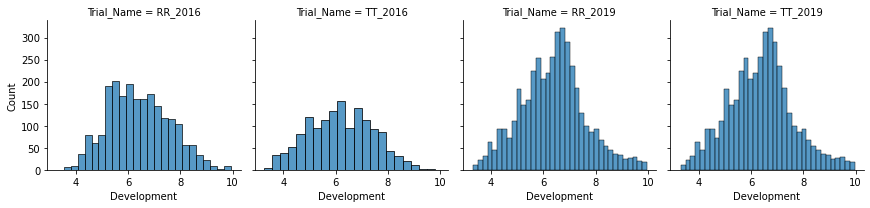

In [34]:
hist = sns.FacetGrid(alltrials_challenge, col="Trial_Name")
hist.map(sns.histplot, 'Development')
hist.set(ylabel = "Count")

**Some analysis** <br>
We can see a pattern of development. On average the most common development values are 6-8 which would mean that it is most common to go 6-8 meters per one pedal rotation. However there are other instances where one rotation takes the person 10 meters or sometimes 2 meters beyond. It would be interesting to see the correlation between speed/cadence and development and then we can comment on which one has a bigger effect on development.

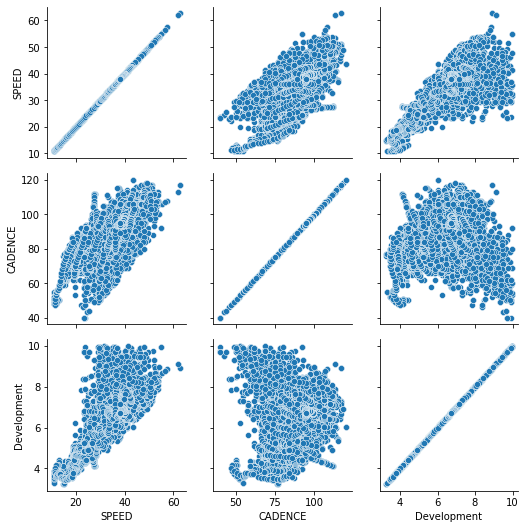

In [35]:
pairplt = sns.PairGrid(alltrials_challenge, vars=["SPEED", "CADENCE",'Development'])
pairplt.map(sns.scatterplot)

**Some analysis** <br>
We can see that speed and cadence have a positive correlation and that in turn creates a Speed-Cadence and Development Correlation. We can say that high Cadence generally results in higher speed, and a higher cadence plus a high speed results in a higher development value.